<a href="https://colab.research.google.com/github/rmontteiro/ML_IGTI_bootcamp/blob/master/Trabalho_pratico_mod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# tensor flow e tfKEras
import tensorflow as tf
from tensorflow import keras

#libraries auxiliares

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.3.0


In [16]:
#importanto base de dados Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [17]:
#nomes das classes
 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [18]:
#treinando o modelo
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_images)

10000

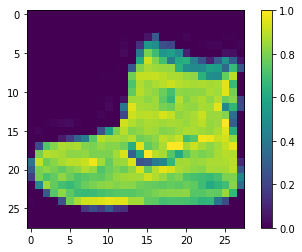

In [32]:
#Pré-processe os dados
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

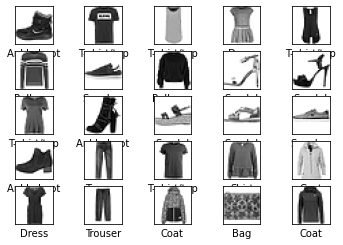

In [33]:
#plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

CONSTRUINDO O MODELO


In [34]:
model =keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')
]) 

In [36]:
#compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
#treinando o modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4966 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [38]:
#avaliando a acuracia
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3396 - accuracy: 0.8816

Test accuracy:  0.881600022315979


In [41]:
#fazendo predições
predictions = model.predict(test_images)
predictions[0]

array([3.9563426e-07, 1.2561310e-11, 6.0744093e-10, 8.8590984e-12,
       1.1792614e-10, 8.4276590e-03, 5.1475496e-07, 3.2692775e-03,
       3.5274991e-07, 9.8830181e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
def plot_image(i, predictions_arrays, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xtricks([])
  plt.ytricks([])

  plt.show(img, cmap=plt.com.binary)

  predicted_label = np.argmax(predicitions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)

In [44]:
def plot_value_array(i, predictions_array, true_label):
  predicitions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xtricks([])
  plt.ytricks([])
  thisplot= plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  preicted_label = np.argmax(predicitions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

UnboundLocalError: ignored

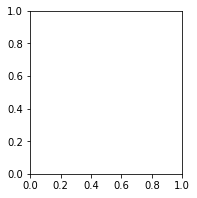

In [46]:
#previsão imagem na posição 0, do array de predição.

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicitions, test_labels)
plt.show()

UnboundLocalError: ignored

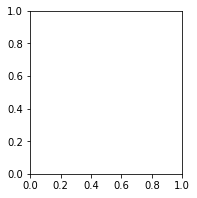

In [47]:
#previsão imagem na posição 0, do array de predição.

i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicitions, test_labels)
plt.show()